## Section: Thông tin
MSSV: 20520934

Họ tên: Bùi Quốc Thịnh

Bài tập: 7

Ngày thực hiện: 19/06/2022

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


## Yêu cầu 1:
Xác định và hiển thị các điểm interest/key points của các cặp ảnh sau:
*   cow1.jpg và cow2.jpg
*   match1.jpg và match2.jpg
*   graf_img1.jpg và graf_img5.jpg



In [2]:
import os
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [6]:
image_path_1='/gdrive/MyDrive/CS231.M21.KHCL/Baitap/Baitap7/images/cow1.jpg'
image_path_2='/gdrive/MyDrive/CS231.M21.KHCL/Baitap/Baitap7/images/cow1(1).jpg'
image_path_3='/gdrive/MyDrive/CS231.M21.KHCL/Baitap/Baitap7/images/cow2.jpg'
image_path_4='/gdrive/MyDrive/CS231.M21.KHCL/Baitap/Baitap7/images/cow2(2).jpg'
image_path_5='/gdrive/MyDrive/CS231.M21.KHCL/Baitap/Baitap7/images/graf_img1.jpg'
image_path_6='/gdrive/MyDrive/CS231.M21.KHCL/Baitap/Baitap7/images/graf_img5.jpg'
image_path_7='/gdrive/MyDrive/CS231.M21.KHCL/Baitap/Baitap7/images/match1.jpg'
image_path_8='/gdrive/MyDrive/CS231.M21.KHCL/Baitap/Baitap7/images/match2.jpg'

## ORB Function

In [9]:
def ORB(image_path_1, image_path_2):
  image_1=cv.imread(image_path_1, 1)
  image_2=cv.imread(image_path_2, 1)
  ORB=cv.ORB_create()
  keypoint_1, descriptor_1=ORB.detectAndCompute(image_1, None)
  keypoint_2, descriptor_2=ORB.detectAndCompute(image_2, None)
  image_1=cv.drawKeypoints(image_1, keypoint_1, None, color=(0,255,0), flags=0)
  image_2=cv.drawKeypoints(image_2, keypoint_2, None, color=(0,255,0), flags=0)
  fg, ax=plt.subplots(1, 2, figsize=(15,15))
  ax[0].imshow(cv.cvtColor(image_1, cv.COLOR_BGR2RGB))
  ax[1].imshow(cv.cvtColor(image_2, cv.COLOR_BGR2RGB))
  bf=cv.BFMatcher(cv.NORM_HAMMING, crossCheck = True)
  matches=bf.match(descriptor_1,descriptor_2)
  matches=sorted(matches, key = lambda x:x.distance)
  final=cv.drawMatches(image_1,keypoint_1,image_2,keypoint_2,matches[:],None)
  plt.figure(figsize=(15,15))
  plt.imshow(cv.cvtColor(final, cv.COLOR_BGR2RGB)),plt.show()

## Brief Function

In [10]:
def brief(path1, path2):
  image1=cv.imread(path1, 1)
  image2=cv.imread(path2, 1)
  star=cv.xfeatures2d.StarDetector_create()
  brief=cv.xfeatures2d.BriefDescriptorExtractor_create()
  keypoint_1=star.detect(image1,None)
  keypoint_2=star.detect(image2,None)
  keypoint_1, descriptor_1=brief.compute(image1, keypoint_1)
  keypoint_2, descriptor_2=brief.compute(image2, keypoint_2)
  img_1=cv.drawKeypoints(image1, keypoint_1, None, color=(0,255,0), flags=0)
  img_2=cv.drawKeypoints(image2, keypoint_2, None, color=(0,255,0), flags=0)
  fg, ax=plt.subplots(1, 2, figsize=(12,6))
  ax[0].imshow(cv.cvtColor(img_1, cv.COLOR_BGR2RGB))
  ax[1].imshow(cv.cvtColor(img_2, cv.COLOR_BGR2RGB))
  bf=cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True) 
  matches=bf.match(descriptor_1, descriptor_2)
  final=cv.drawMatches(img_1,keypoint_1,img_2,keypoint_2,matches[:],None)
  plt.figure(figsize=(15,15))
  plt.imshow(cv.cvtColor(final, cv.COLOR_BGR2RGB)),plt.show()

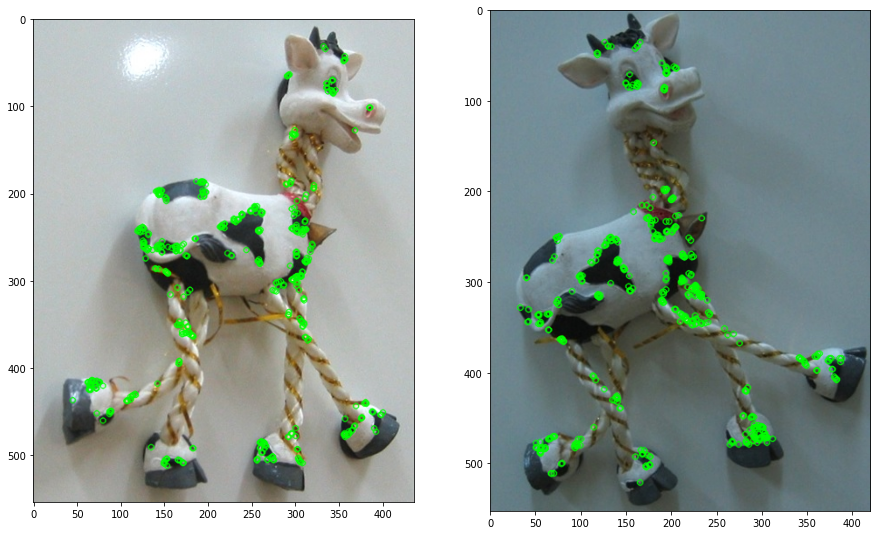

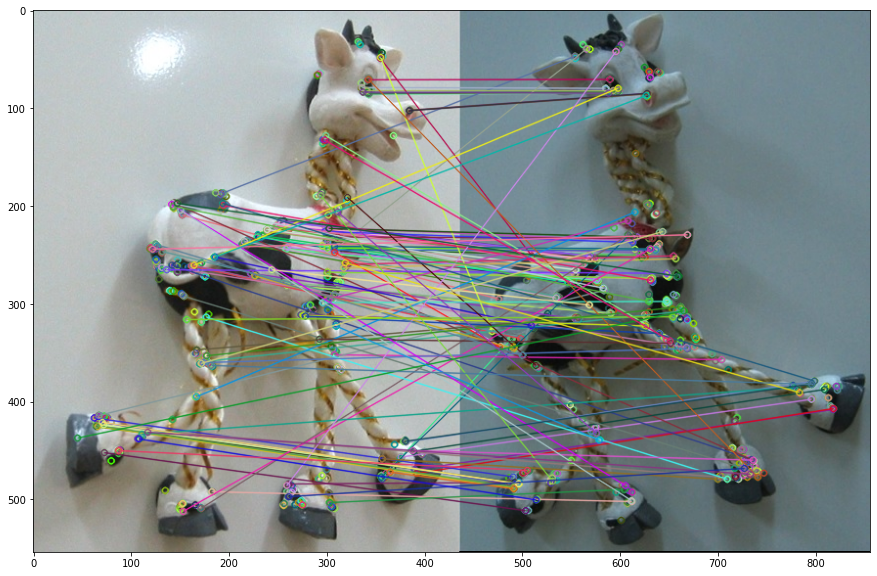

In [11]:
ORB(image_path_1,image_path_3)

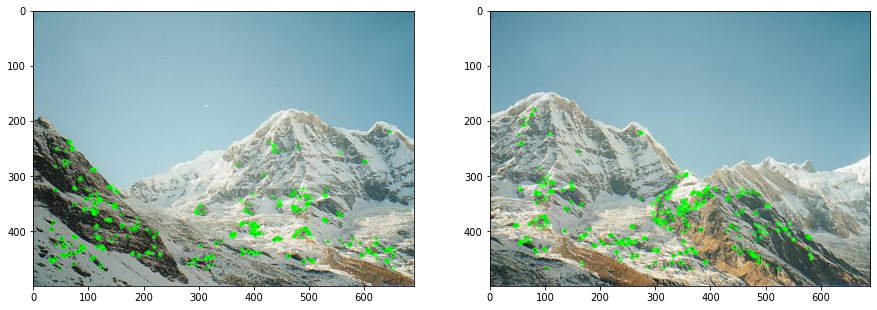

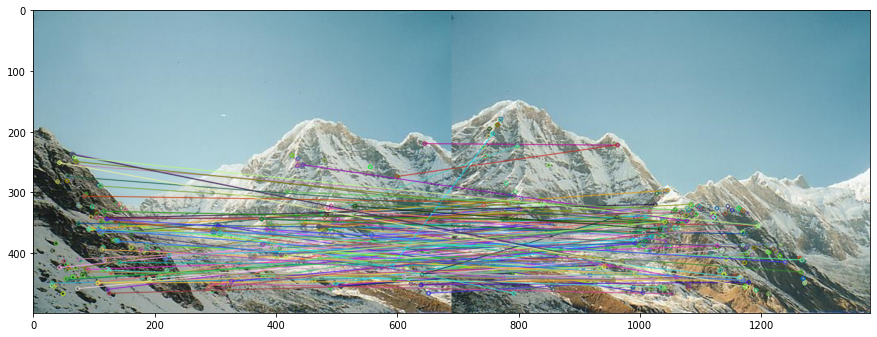

In [12]:
ORB(image_path_7,image_path_8)

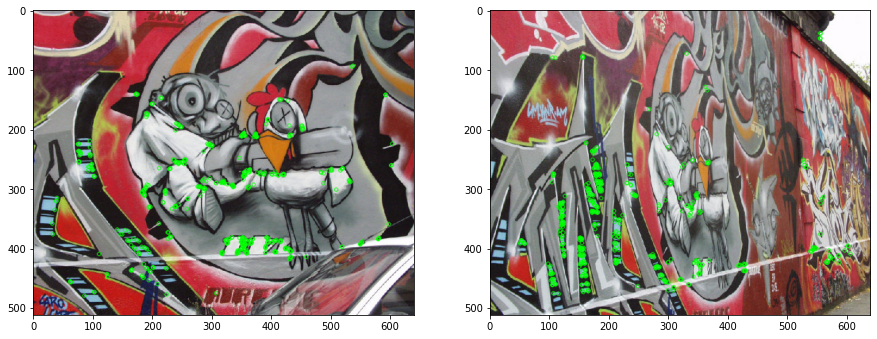

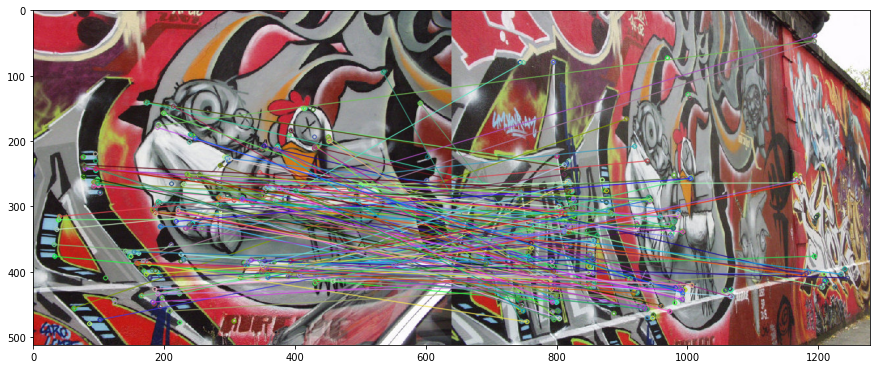

In [13]:
ORB(image_path_5, image_path_6)

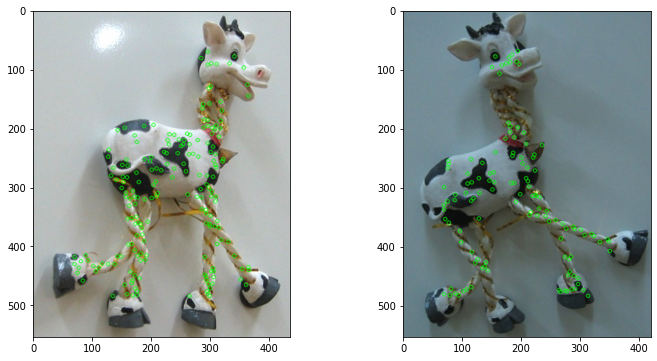

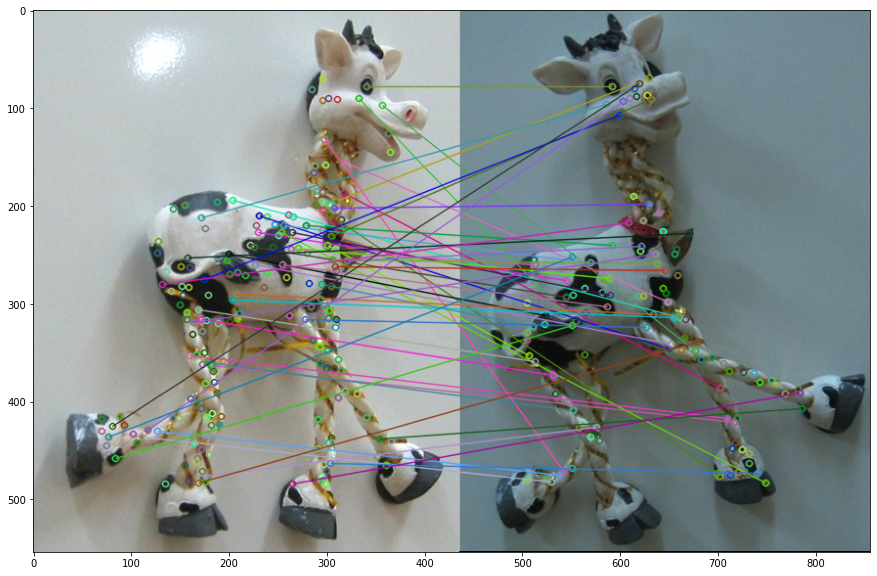

In [14]:
brief(image_path_1,image_path_3)

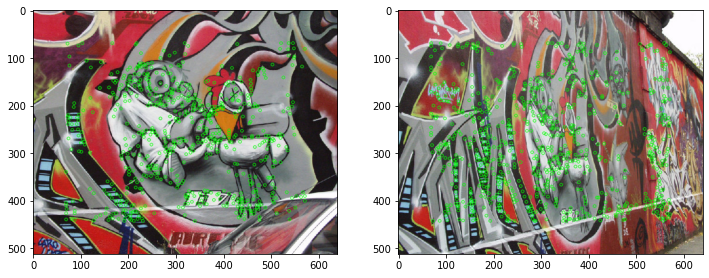

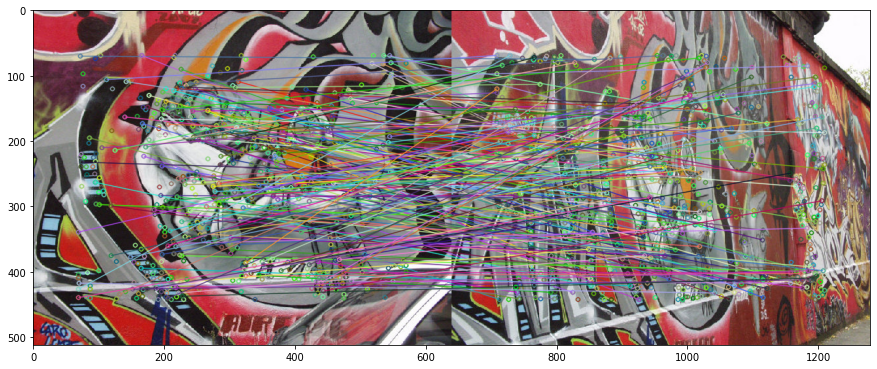

In [15]:
brief(image_path_5, image_path_6)

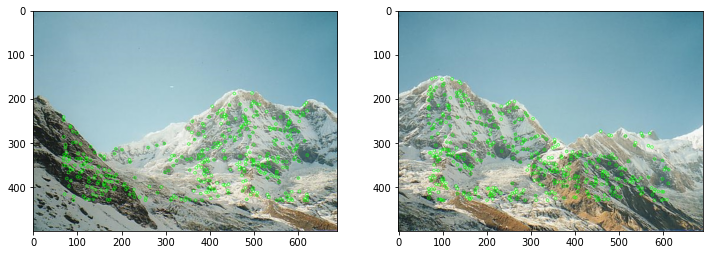

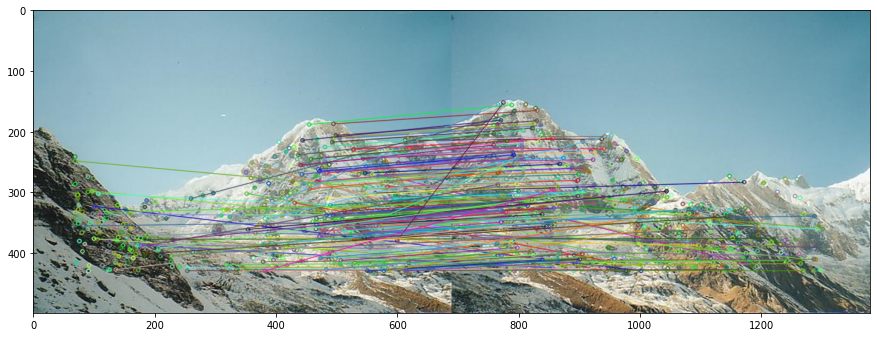

In [16]:
brief(image_path_7,image_path_8)